# <b>FEATURE MATCHING AND HOMOGRAPHY</b>

## Making all the necessary imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the reference image

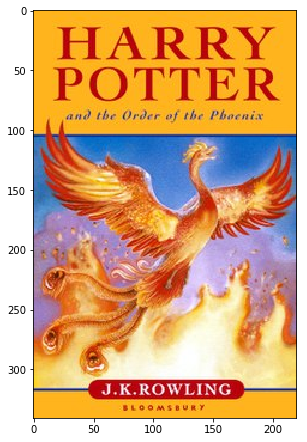

In [2]:
obj = cv2.imread('Images/hp1.jpg')
obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(9,7.5))
sub = fig.add_subplot(111)
sub.imshow(obj)


## Converting image to grayscale for further operations

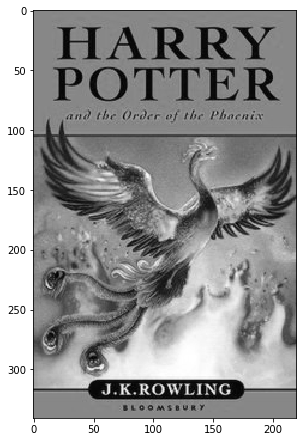

In [3]:
gray_obj = cv2.cvtColor(obj, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(9,7.5))
sub = fig.add_subplot(111)
sub.imshow(gray_obj, cmap='gray')

## Loading the scene for tracking

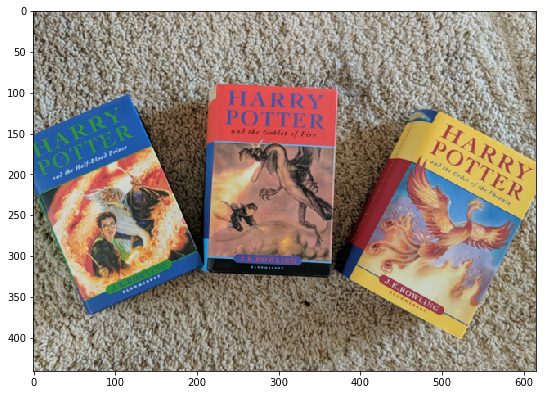

In [4]:
scene = cv2.imread('Images/hp2.png')
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(9,7.5))
sub = fig.add_subplot(111)
sub.imshow(scene)

## Converting image to grayscale for further operations

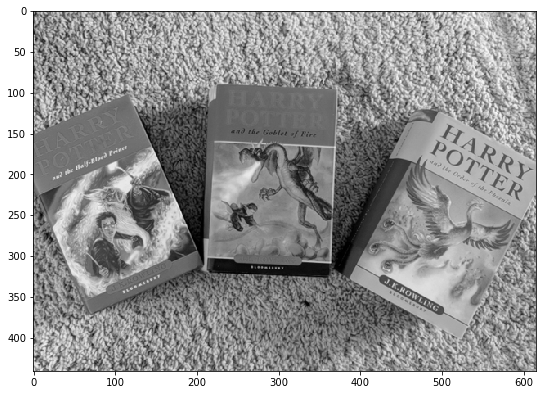

In [5]:
gray_scene = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(9,7.5))
sub = fig.add_subplot(111)
sub.imshow(gray_scene, cmap='gray')

## Applying Sift algorithm
### Algorithm used for Feature tracking

In [6]:
sift_obj = cv2.xfeatures2d.SIFT_create()

### Obtaining keypoints and descriptors for the images

In [7]:
kp1, des1 = sift_obj.detectAndCompute(gray_obj, None)
kp2, des2 = sift_obj.detectAndCompute(gray_scene, None)

## Using Flann based matcher
### Obtaining Flann parameters

In [8]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)  

### Initializing Flann matcher object

In [9]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

### Using K-Nearest Neighbours to obtain nearest matches

In [10]:
matches = flann.knnMatch(des1, des2, k = 2)

## Storing the good features

In [11]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append(match1)

## Using Homography and Perspective Transform to detect the object in the scene based on the features

In [12]:
if len(good)>10:
    src_pts = np.float32([kp1[i.queryIdx].pt for i in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[i.trainIdx].pt for i in good]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h,w = gray_obj.shape
    pts = np.float32([[0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)

    img2 = cv2.polylines(scene, [np.int32(dst)], True, (0, 255, 0), 5, cv2.LINE_AA)

## Drawing the matched keypoints and displaying the resultant image

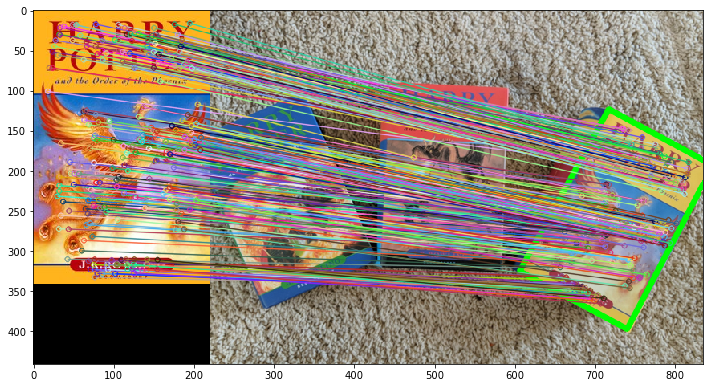

In [13]:
draw_params = dict(matchColor = (0,255,0), singlePointColor = None,
                   matchesMask = matchesMask, flags = 2)

img3 = cv2.drawMatches(obj, kp1, scene, kp2, good, None, flags=2)

fig = plt.figure(figsize=(12,10))
sub = fig.add_subplot(111)
sub.imshow(img3)

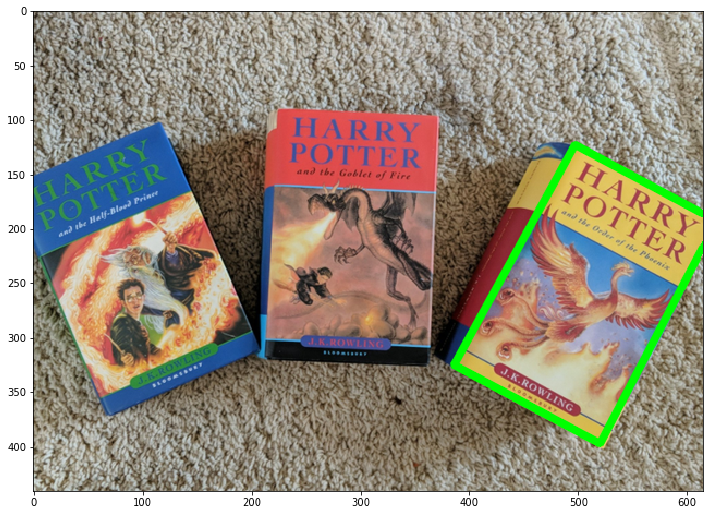

In [14]:
fig = plt.figure(figsize=(12,10))
sub = fig.add_subplot(111)
plt.imshow(scene)